In [1]:
import pandas as pd
# from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import seed as random_seed # look at test code (`test.ipynb`) which tests for reproducibility of model results

In [2]:
def checkDataFrameForNaNValues(df):
    # Find rows with NaN values and their respective contents
    nan_rows = df[df.isna().any(axis=1)]
    # print('data.isna().any(axis=1)', data.isna().any(axis=1), sep='\n')

    # Check there are no NaN values (i.e. nan_rows is not empty). If yes report them.
    assert len(nan_rows) == 0, f'There are {len(nan_rows)} NaN values:\n{nan_rows}'
checkDataForNaNValues = lambda: checkDataFrameForNaNValues(data)

In [3]:
# random seeds
randomSeeds = dict()
randomSeeds['sklearn'] = 20
randomSeeds['tensorflow'] = 32
randomSeeds['random'] = 42 # random seed of random module

In [4]:
# Load dataset
data = pd.read_csv("Telco-Customer-Churn.csv")
totalNumRows = len(data)
print('Number of rows:', totalNumRows)

# Print column names to debug
for col in data.columns:
    print('Column:', col, '\t', data[col].dtype)
    print(data[col].unique())
    print()    

Number of rows: 7043
Column: customerID 	 object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender 	 object
['Female' 'Male']

Column: SeniorCitizen 	 int64
[0 1]

Column: Partner 	 object
['Yes' 'No']

Column: Dependents 	 object
['No' 'Yes']

Column: tenure 	 int64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService 	 object
['No' 'Yes']

Column: MultipleLines 	 object
['No phone service' 'No' 'Yes']

Column: InternetService 	 object
['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity 	 object
['No' 'Yes' 'No internet service']

Column: OnlineBackup 	 object
['Yes' 'No' 'No internet service']

Column: DeviceProtection 	 object
['No' 'Yes' 'No internet service']

Column: TechSupport 	 object
['No' 'Yes' 'No internet service']

Column: StreamingT

In [5]:
# Find rows with NaN values and their respective contents
nan_rows = data[data.isna().any(axis=1)]
# Check there are no NaN values (i.e. nan_rows is not empty). If yes report them.
assert len(nan_rows) == 0, "There are NaN values:\n" + str(nan_rows)

In [6]:
categorical_columns = ['InternetService', 'OnlineSecurity', 'MultipleLines',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
two_value_columns = ['gender']

columns = list(set(categorical_columns).union(yes_no_columns, two_value_columns))

print(columns)

# SeniorCitizen is already 0/1.

['StreamingTV', 'TechSupport', 'MultipleLines', 'OnlineSecurity', 'PhoneService', 'OnlineBackup', 'StreamingMovies', 'Contract', 'Dependents', 'gender', 'PaperlessBilling', 'PaymentMethod', 'Partner', 'DeviceProtection', 'InternetService']


In [7]:
# Display basic information about the dataset
data.info()

# Summary statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

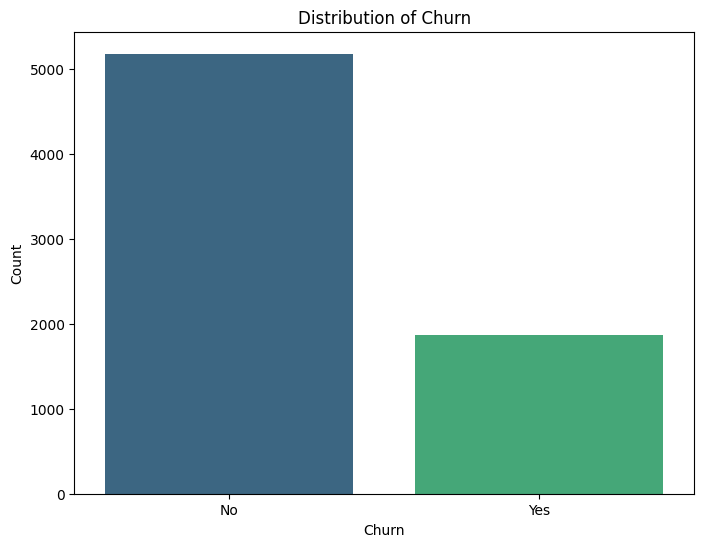

In [8]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn', hue='Churn', palette='viridis', legend=False)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

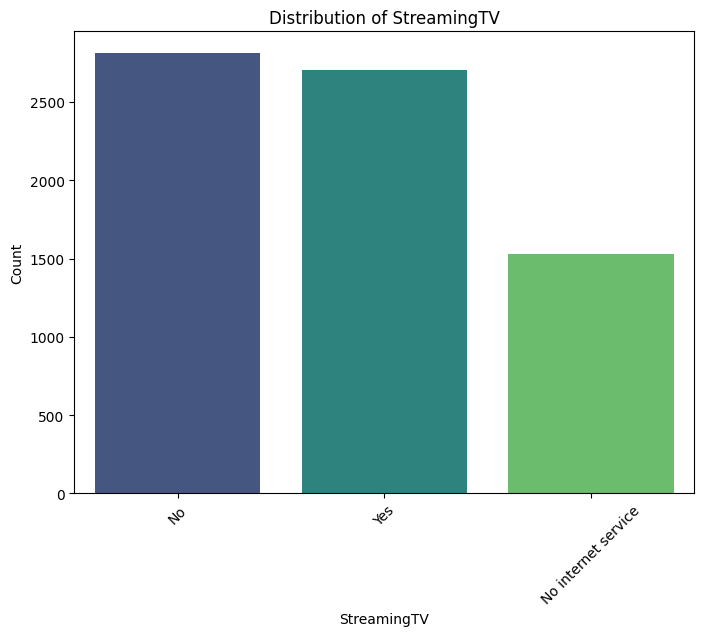

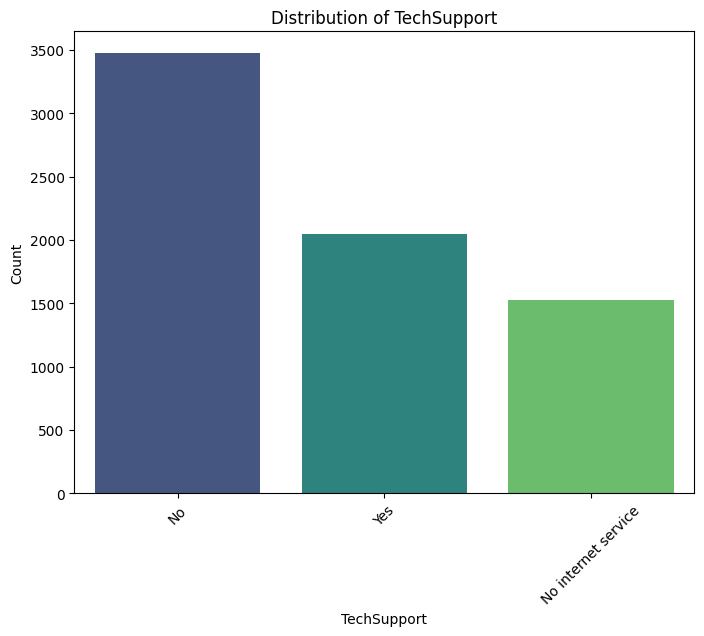

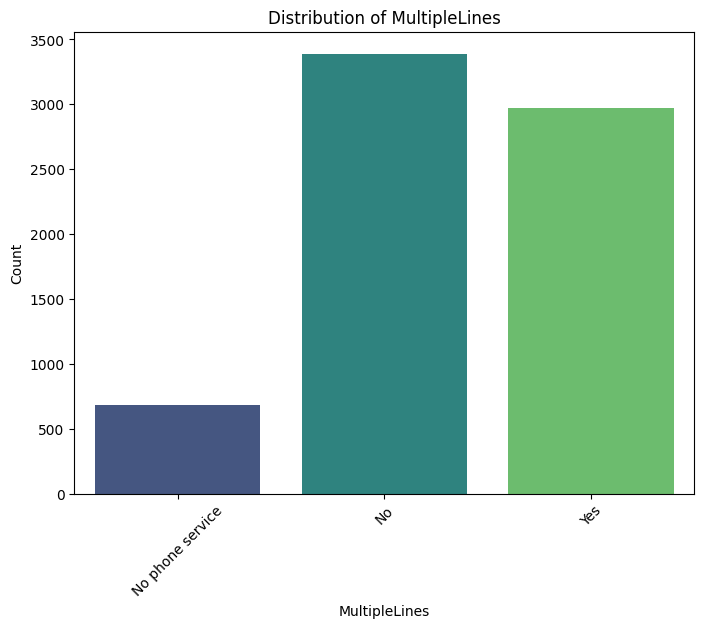

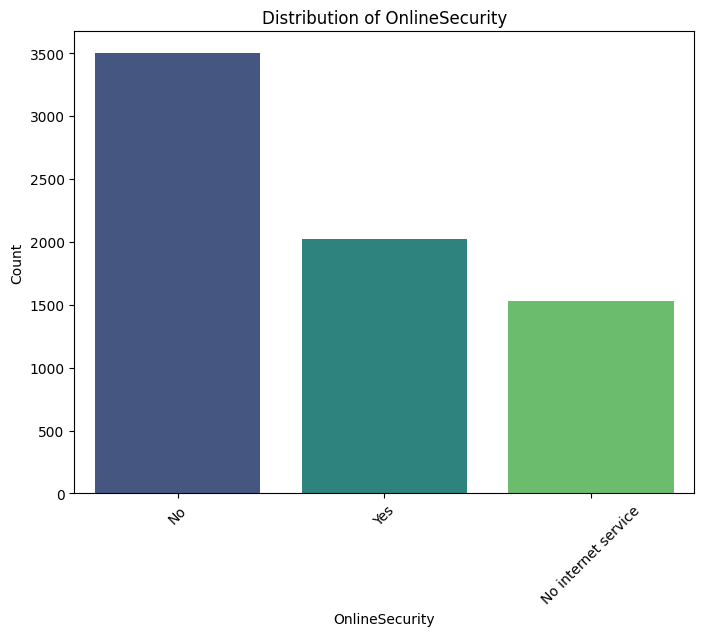

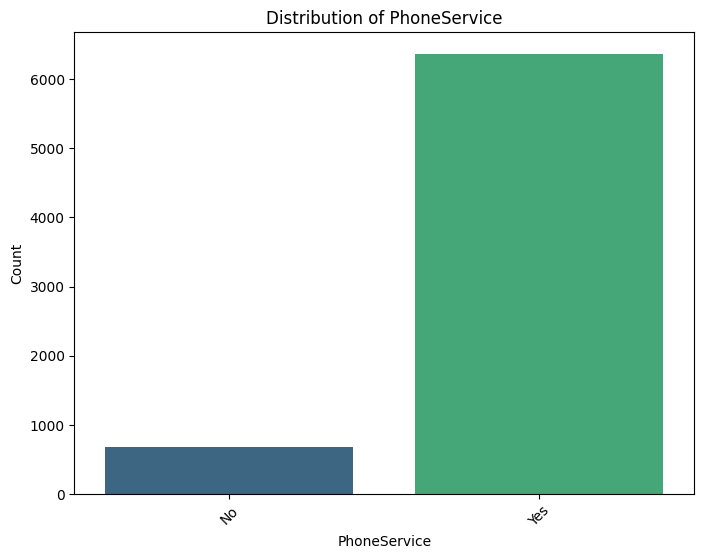

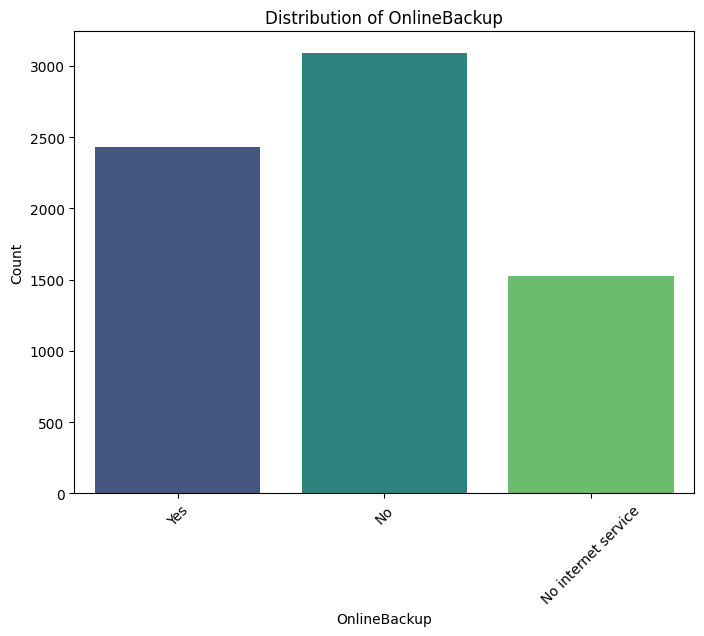

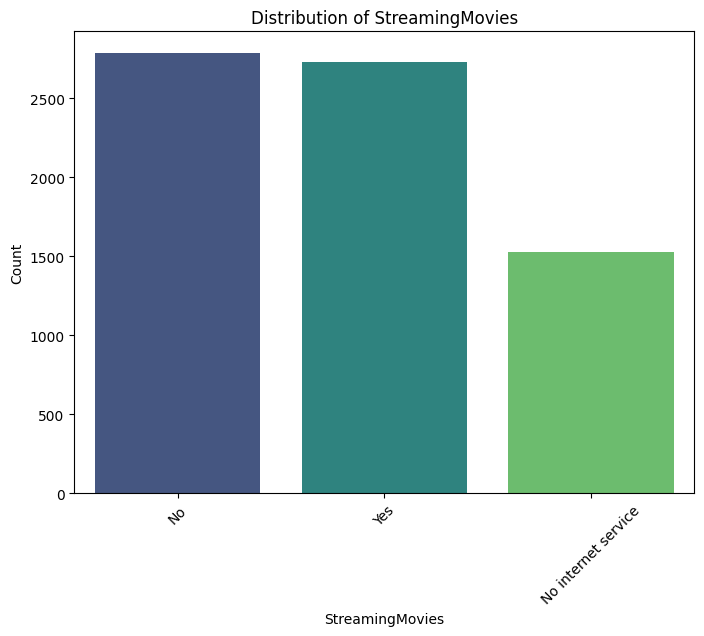

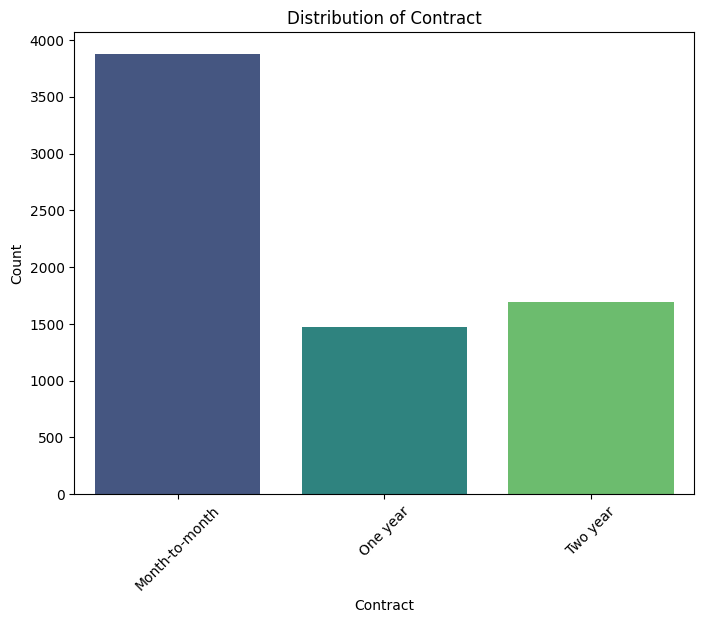

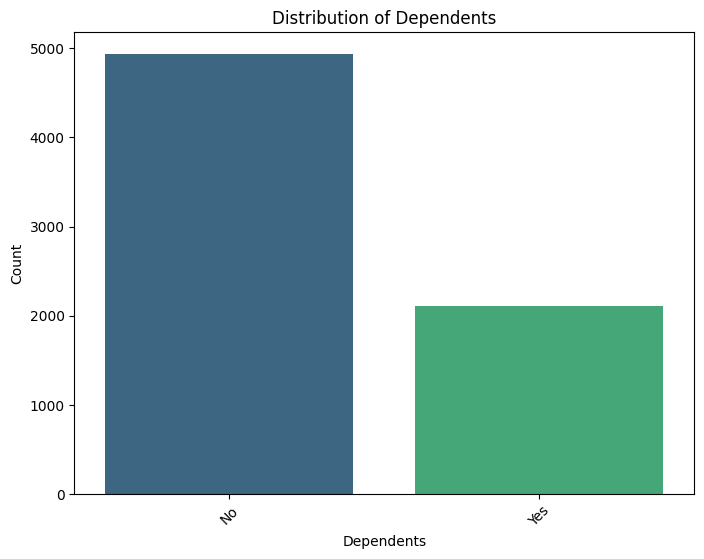

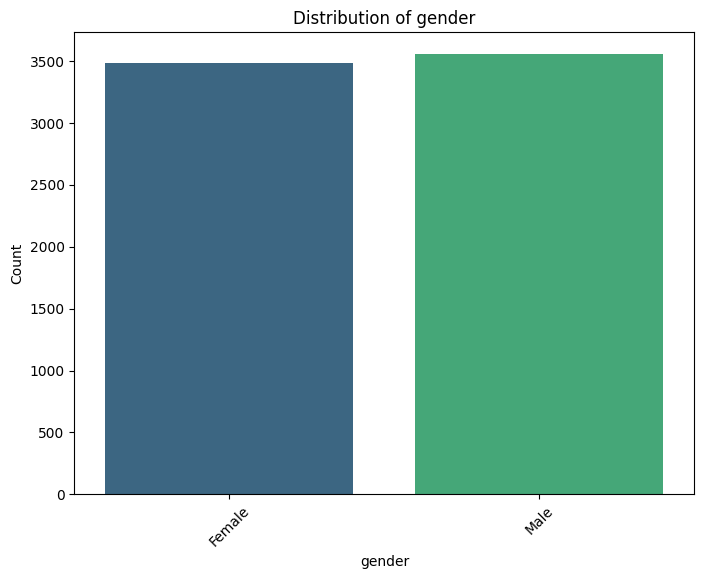

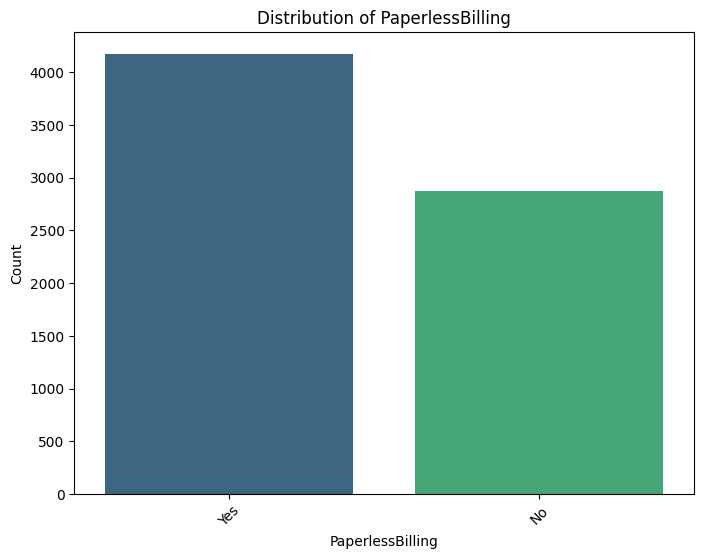

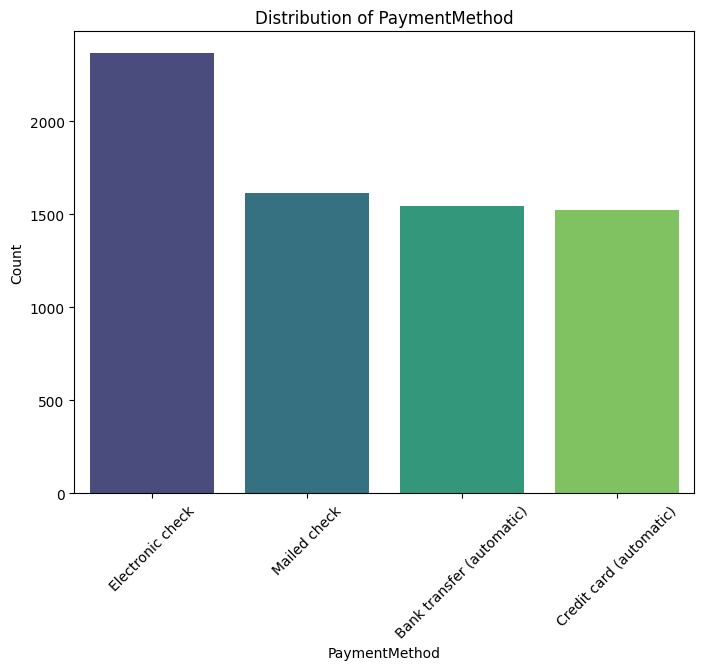

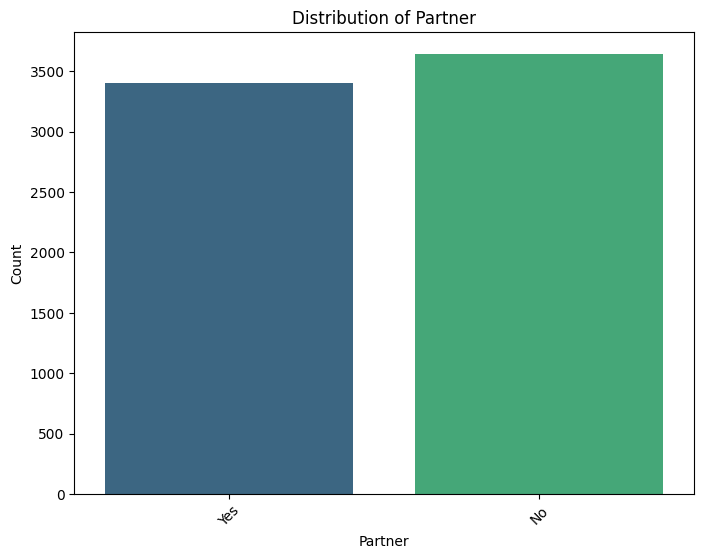

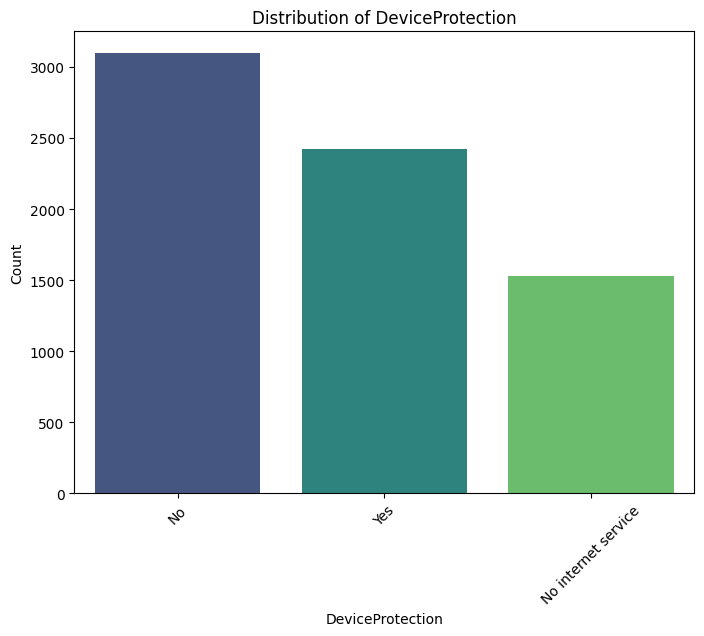

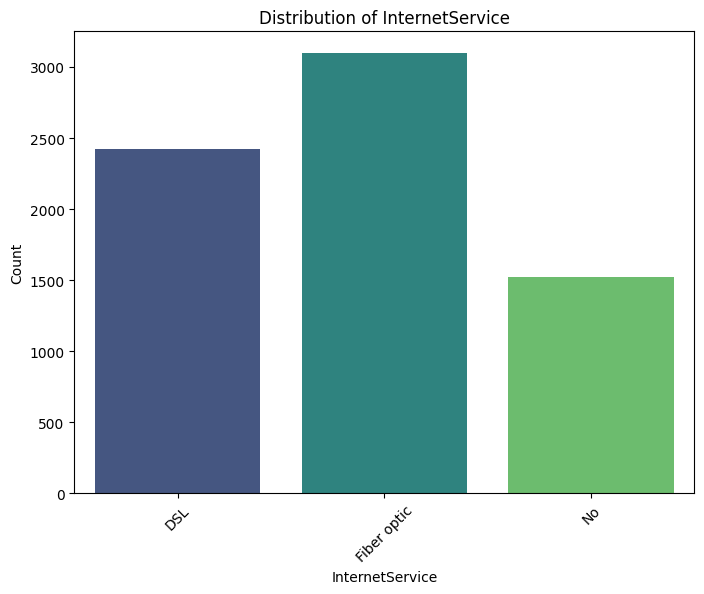

In [9]:
# Plot the distribution of categorical features
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, hue=column, palette='viridis', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

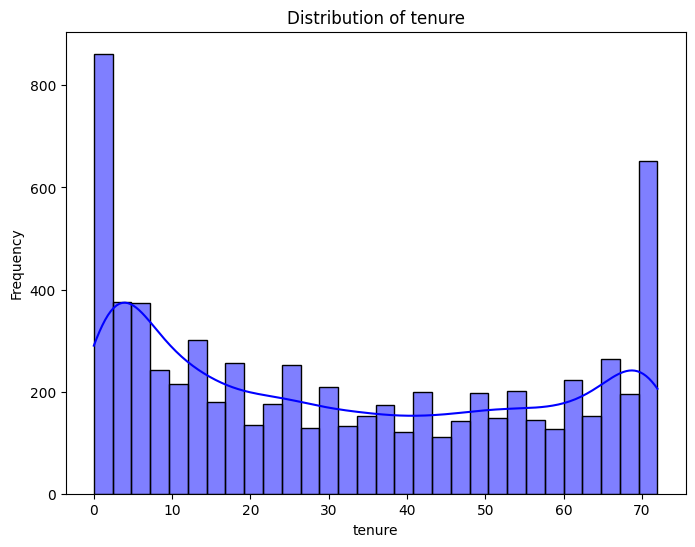

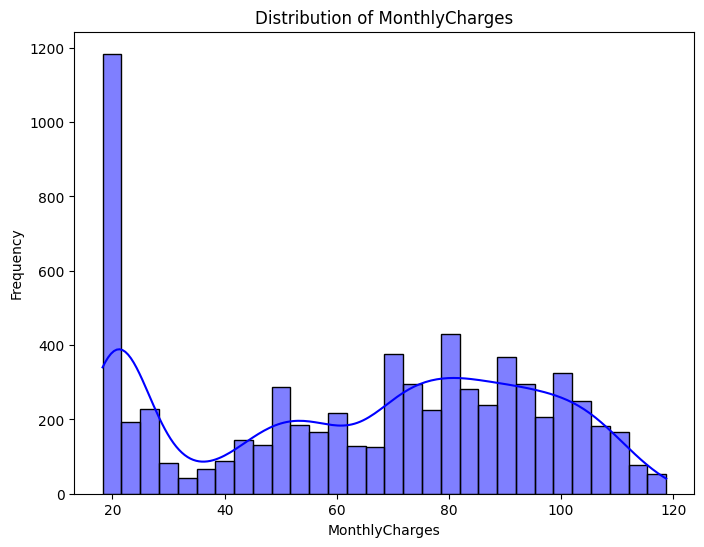

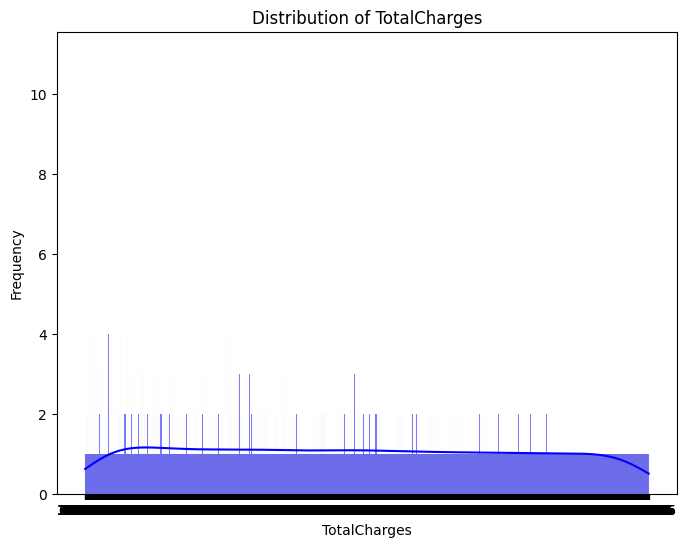

In [10]:
# List of numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot the distribution of numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, kde=True, bins=30, color='blue', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


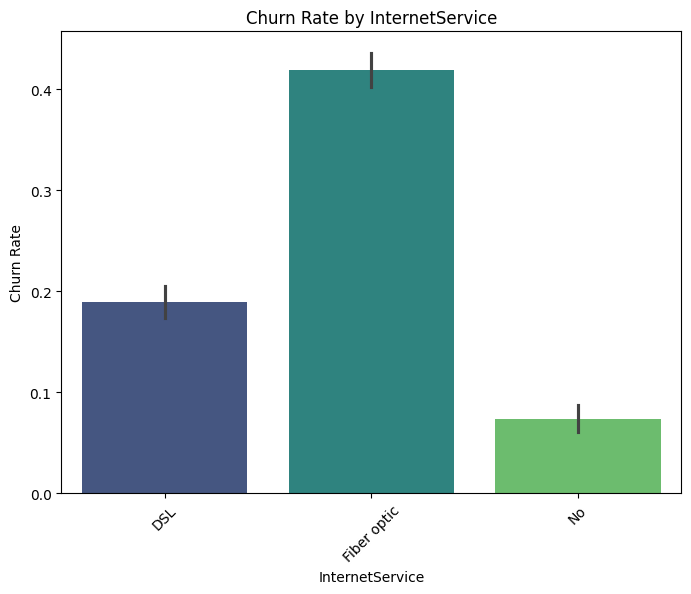

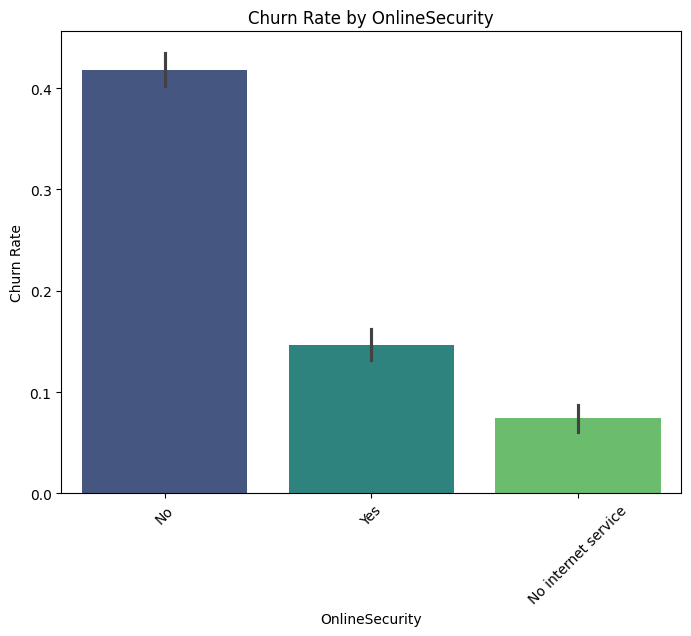

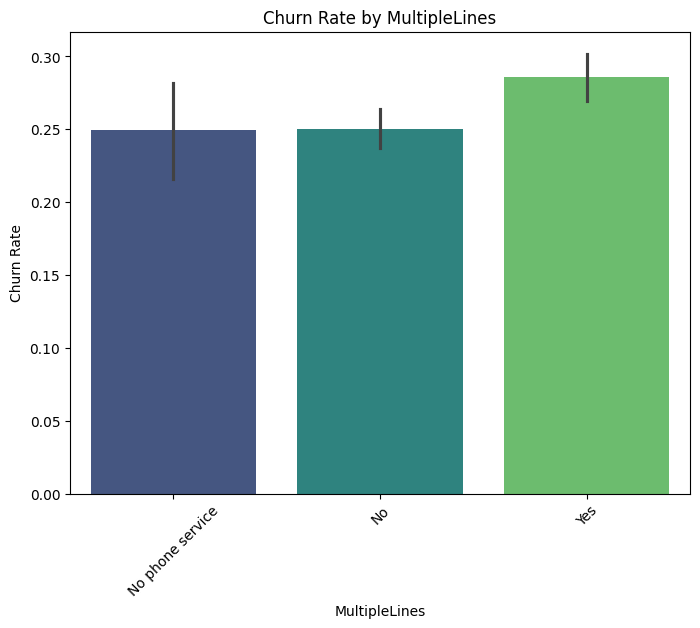

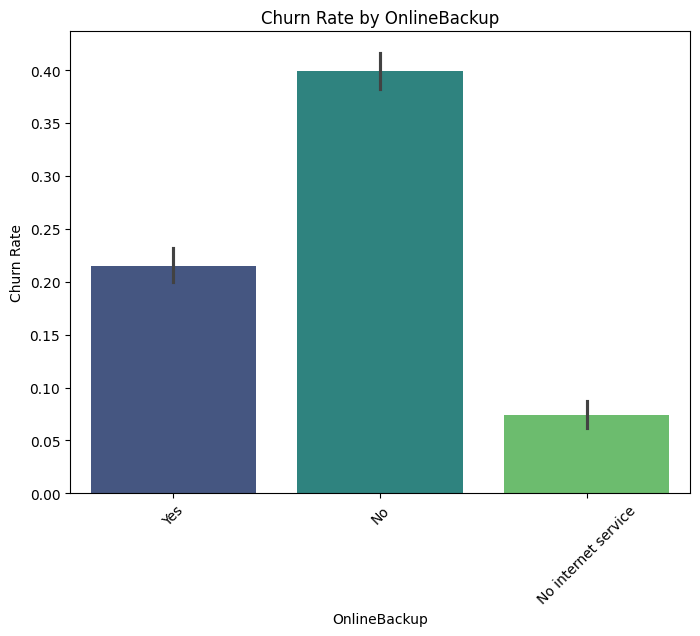

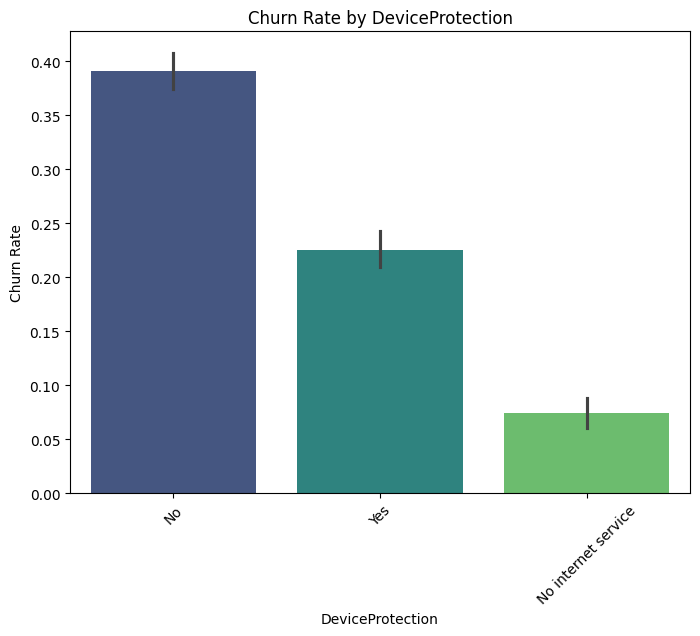

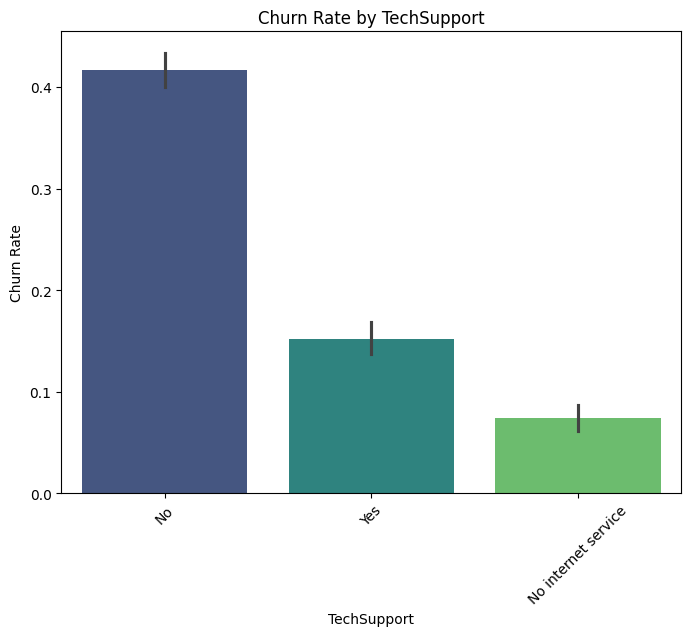

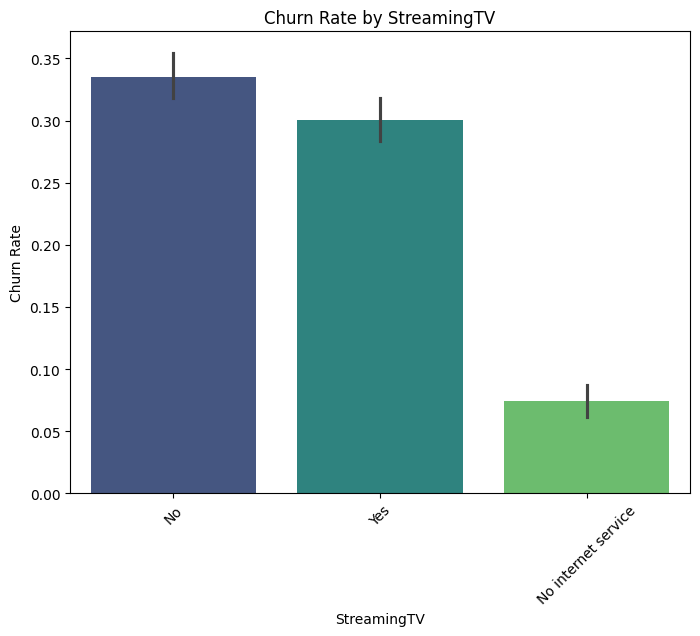

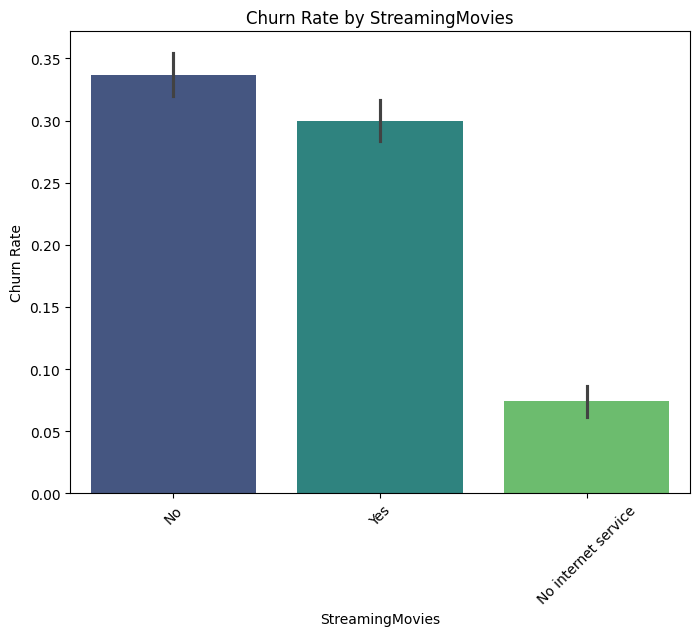

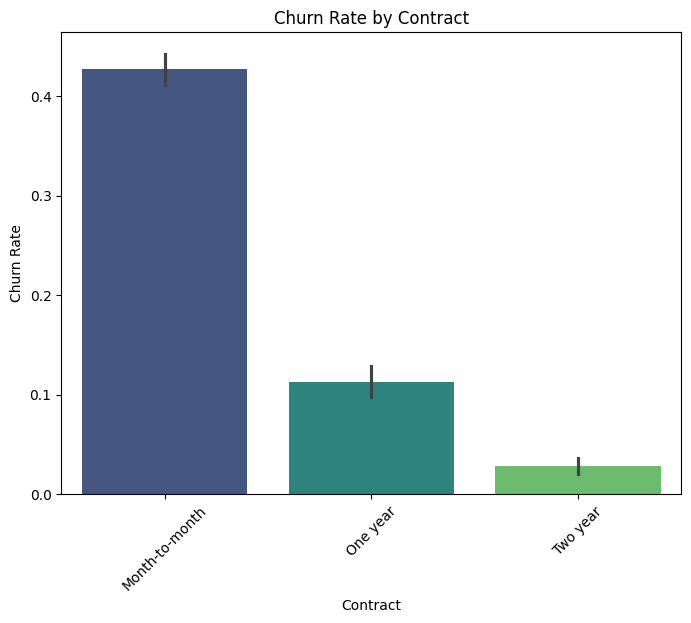

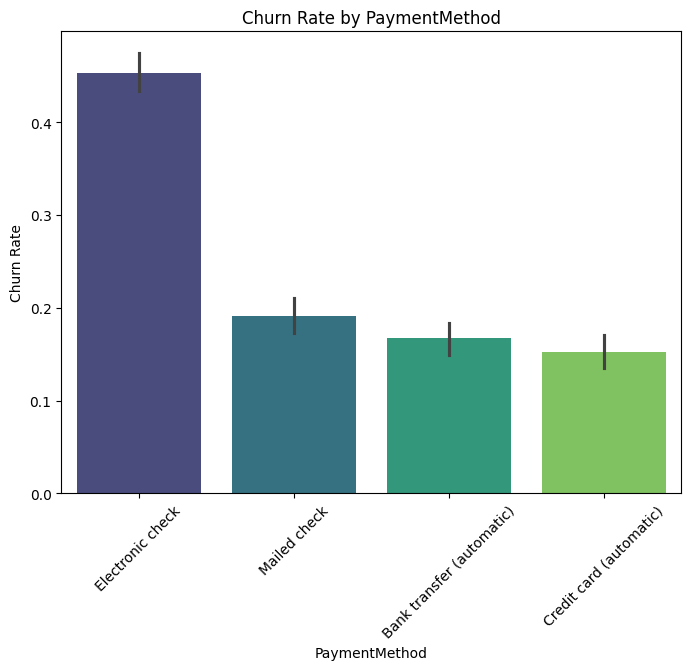

In [11]:
# Plot churn rates by categorical features
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=data, x=column, hue=column, y=data['Churn'].map({'Yes': 1, 'No': 0}), palette='viridis', legend=False)
    plt.title(f'Churn Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()


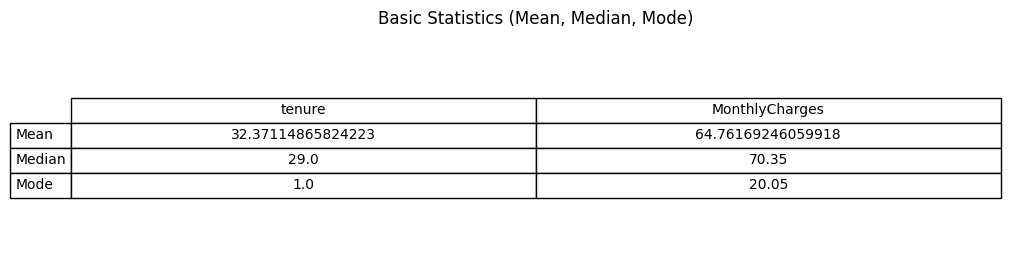

In [12]:
# Calculate basic statistics - added myself (code from chatGPT) - Luca
numericData = data.select_dtypes(include=['number']).drop(columns=['SeniorCitizen'])

statistics = numericData.agg(['mean', 'median', lambda x: x.mode()[0]])
statistics.index = ['Mean', 'Median', 'Mode']

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')  # Remove axes
table = ax.table(cellText=statistics.values,
                 colLabels=statistics.columns,
                 rowLabels=statistics.index,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)  # Adjust size
plt.title("Basic Statistics (Mean, Median, Mode)")
plt.show()

The above table contained `SeniorCitizen` and `Churn` which can be interpreted as Yes/No (binary/categorical) variable. For now `Churn` is still stored as `0`s (No) and `1`s (Yes). These were removed to only keep numeric variables.

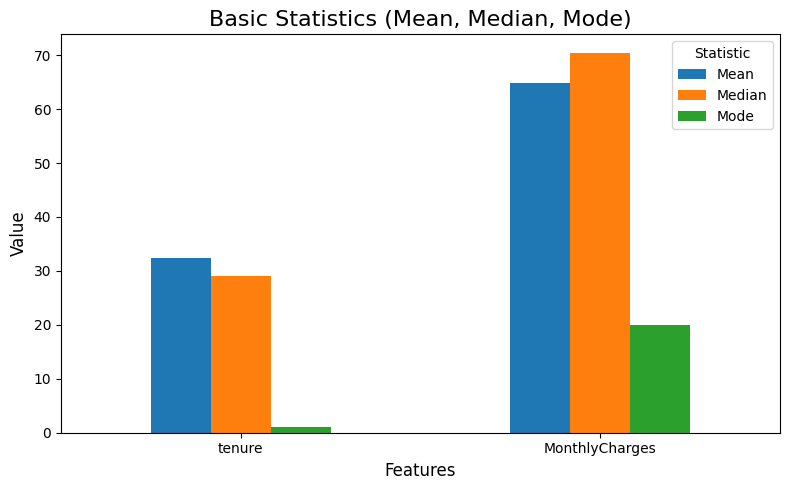

In [13]:
# Calculate basic statistics - added myself (code from chatGPT) - Luca

# Transpose statistics for plotting
statistics_transposed = statistics.T
statistics_transposed.plot(kind='bar', figsize=(8, 5))

# Customizing the plot
plt.title('Basic Statistics (Mean, Median, Mode)', fontsize=16)
plt.ylabel('Value', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

In [14]:
print(statistics)

           tenure  MonthlyCharges
Mean    32.371149       64.761692
Median  29.000000       70.350000
Mode     1.000000       20.050000


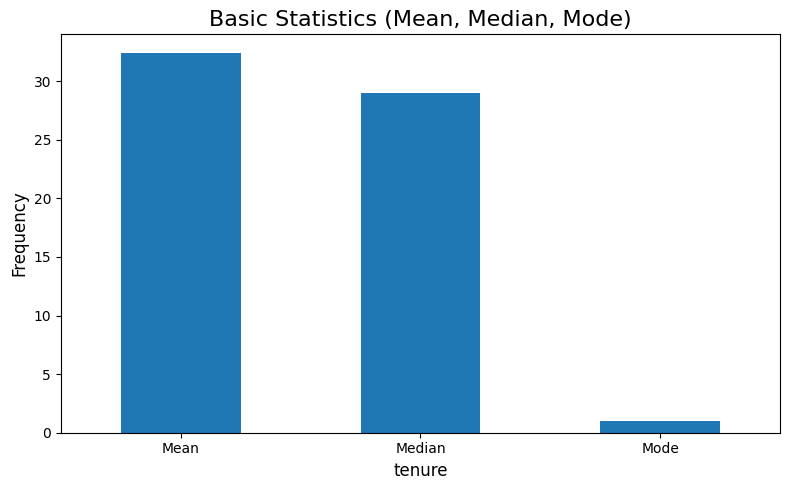

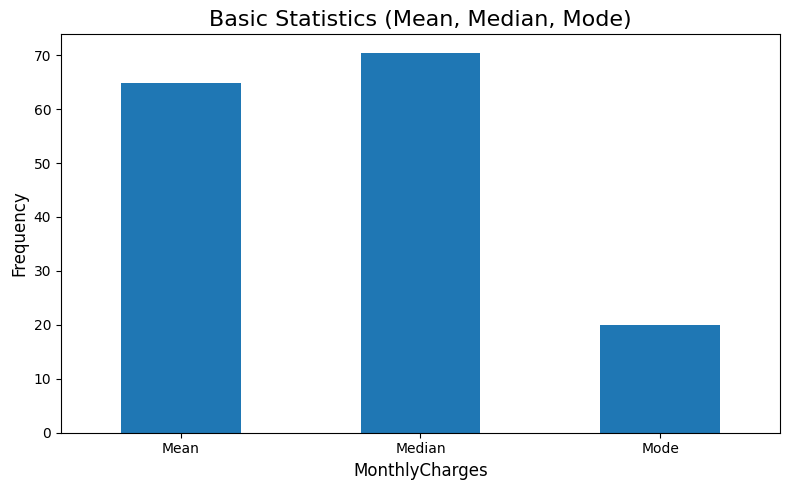

In [15]:
# Separate statistics to better show each column
for columnName in statistics.columns:
    statistics[columnName].plot(kind='bar', figsize=(8, 5), legend=False)
    
    # Customizing the plot
    plt.title('Basic Statistics (Mean, Median, Mode)', fontsize=16)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(columnName, fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [16]:
# Convert Churn column from Yes/No to Binary 0/1
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [17]:
# Convert TotalCharges to numerical for correlation
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows where 'TotalCharges' is NaN -- since NaN rows was found to be 11 after runs of `checkDataForNaNValues()` and there are over 7000 rows, we can remove these 11
nan_rows = data[data.isna().any(axis=1)] # Find rows with NaN values and their respective contents
numRowsDropped = len(nan_rows)
print('numRowsDropped: ', numRowsDropped)
data = data.dropna(subset=['TotalCharges'])

numRowsDropped:  11


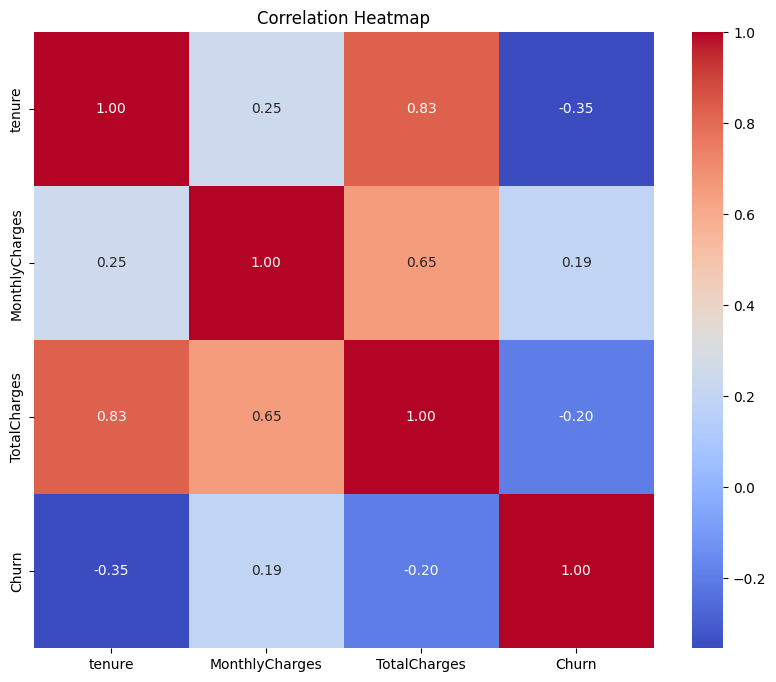

In [18]:
# Calculate correlation matrix
correlation_matrix = data[numerical_columns + ['Churn']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [19]:
churn_column = data['Churn']

# Calculate required statistics
total_count = len(churn_column)
count_1 = (churn_column == 1).sum()
count_0 = (churn_column == 0).sum()
percentage_1 = (count_1 / total_count) * 100
percentage_0 = (count_0 / total_count) * 100

# Print results
print(f"Total count: {total_count}")
print(f"Count of 1: {count_1}")
print(f"Count of 0: {count_0}")
print(f"Percentage of 1: {percentage_1:.2f}%")
print(f"Percentage of 0: {percentage_0:.2f}%")

Total count: 7032
Count of 1: 1869
Count of 0: 5163
Percentage of 1: 26.58%
Percentage of 0: 73.42%


Churn columns statistics shown in a table


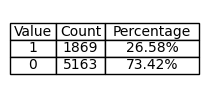

Total count: 7032


In [20]:
print('Churn columns statistics shown in a table')
table_data = [
    [1, count_1, f"{percentage_1:.2f}%"],
    [0, count_0, f"{percentage_0:.2f}%"]
]

# Define column and row labels
columns = ["Value", "Count", "Percentage"]

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(2, 1))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=table_data, colLabels=columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(columns))))

# Show the table
plt.show()

print(f"Total count: {total_count}") # remaining variable

# One-Hot-Encoding

In [21]:
print(data.columns)
print(data.head())

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...       

In [22]:
# Check the columns list
print("Columns list:")
print(columns)

# Compare with DataFrame columns
print("DataFrame columns:")
print(data.columns)

# Check if all `columns` are in `data`
missing_columns = [col for col in columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All columns are present in the DataFrame.")


Columns list:
['Value', 'Count', 'Percentage']
DataFrame columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Missing columns: ['Value', 'Count', 'Percentage']


In [23]:
checkDataForNaNValues()

In [24]:
# Step 4: Remove the customerID column - we do not need this.
if 'customerID' in data.columns:
    data = data.drop(columns=['customerID'])

# Perform one-hot encoding

# Step 1: Convert 'gender' column to 0/1
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
print("(Gender) Data Frame columns:", data.columns)

# Step 2: Convert Yes/No columns to 0/1
for col in yes_no_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
print("Yes/No Data Frame columns:", data.columns)

# Step 3: One-hot encode categorical columns

# Function to generate one-hot mapping dynamically
def generate_one_hot_mapping(unique_values):
    mapping = {value: [1 if i == j else 0 for i in range(len(unique_values))]
               for j, value in enumerate(unique_values)}
    return mapping

for col in categorical_columns:
    # Generate the mapping dynamically
    unique_values = data[col].unique()  # Get unique values from the column
    one_hot_mapping = generate_one_hot_mapping(unique_values)
    # Replace string values with one-hot-encoded lists
    data[col] = data[col].map(one_hot_mapping)

# Step 4: Ensure all columns are numeric
# Convert all Boolean columns (True/False) to numeric (0/1)
data = data.map(lambda x: 1 if x is True else (0 if x is False else x))

# Note that Churn was converted to numeric in previous cells.

# Check the results
print(data.head())

(Gender) Data Frame columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Yes/No Data Frame columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1 

In [25]:
print(data.dtypes)

# Select non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("\nNon-numeric columns:")
print(non_numeric_columns, "\n")
print(data[non_numeric_columns])

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Non-numeric columns:
Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object') 

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0        [1, 0, 0]       [1, 0, 0]      [1, 0, 0]    [1, 0, 0]   
1        [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1

This shows that non-numerical columns are the one-hot encoded categorical variables which turned into lists of numbers due to one-hot encoding. This is good for neural network.

In [26]:
checkDataForNaNValues()

# Assert that all elements in the DataFrame are either a number or a list/array of numbers
assert data.map(lambda x: 
                     np.issubdtype(type(x), np.number) or 
                     (isinstance(x, (list, np.ndarray)) and all(np.issubdtype(type(i), np.number) for i in x))
                    ).all().all(), "Not all elements are numbers or lists/arrays of numbers."

assert len(data) == totalNumRows - numRowsDropped

# Print for visual part of the dataframe for visual of data elements
print(data.head(10))

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   
5       1              0        0           0       8             1   
6       0              0        0           1      22             1   
7       1              0        0           0      10             0   
8       1              0        1           0      28             1   
9       0              0        0           1      62             1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0     [1, 0, 0]       [1, 0, 0]      [1, 0, 0]    [1, 0, 0]        [1, 0, 0]   
1     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0

In [27]:
df_X = data.drop(columns=['Churn'])
df_y = data['Churn']
assert len(df_X) == len(df_y)
assert len(df_X) == totalNumRows - numRowsDropped

# Convert dataframces to Numpy arrays
X = df_X.to_numpy()
y = df_y.to_numpy()
assert len(X) == len(df_X)
assert len(y) == len(df_y)
print('len(X): ', len(X))
print('len(y): ', len(y))

len(X):  7032
len(y):  7032


In [28]:
print(data.head())
print()
print(df_X.head())
print()
print(df_y.head())
print()
print(X)
print()
print(y)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0     [1, 0, 0]       [1, 0, 0]      [1, 0, 0]    [1, 0, 0]        [1, 0, 0]   
1     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0]        [0, 1, 0]   
2     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [1, 0, 0]        [1, 0, 0]   
3     [1, 0, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0]        [0, 1, 0]   
4     [0, 1, 0]       [0, 1, 0]      [1, 0, 0]    [0, 1, 0]        [1, 0, 0]   

  TechSupport StreamingTV StreamingMovies   Contract  PaperlessBilling  \
0   [1, 0, 0]   [1

At this point the data frame should contain only numeric columns or columns that are categorical feature represented as binary vector stored in a Python list.

The next step is that you create Numpy arrays from this data. 

You then create the training examples. Typically the input features are stored in an array X and the target label, Churn, is stored in an array y.

You can use Scikit-learn to split the data randomly into training and testing.

In [29]:
# Flatten each row of X (input) by expanding one-hot encoded lists into separate columns
flattened_rows = np.array([np.concatenate([np.array(x) if isinstance(x, list) else [x] for x in row]) for row in X])
print("X\n", X)
print(X.dtype)
print("\nflattened_rows\n", flattened_rows)
print(flattened_rows.dtype)

X
 [[1 0 1 ... list([1, 0, 0, 0]) 29.85 29.85]
 [0 0 0 ... list([0, 1, 0, 0]) 56.95 1889.5]
 [0 0 0 ... list([0, 1, 0, 0]) 53.85 108.15]
 ...
 [1 0 1 ... list([1, 0, 0, 0]) 29.6 346.45]
 [0 1 1 ... list([0, 1, 0, 0]) 74.4 306.6]
 [0 0 0 ... list([0, 0, 1, 0]) 105.65 6844.5]]
object

flattened_rows
 [[1.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 2.9850e+01 2.9850e+01]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 5.6950e+01 1.8895e+03]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 5.3850e+01 1.0815e+02]
 ...
 [1.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 2.9600e+01 3.4645e+02]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 0.0000e+00 7.4400e+01 3.0660e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 1.0565e+02 6.8445e+03]]
float64


In [30]:
# Assert no null values in input sets
print(np.isnan(flattened_rows).any())
assert not np.isnan(flattened_rows).any(), "The array contains NaN values."

X = flattened_rows # update X

False


In [31]:
# Split the dataset into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split

# Assuming X is the input data and y is the output labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomSeeds['sklearn'], shuffle=True)
print("X_train:", X_train, "X_test:", X_test, "y_train:", y_train, "y_test:", y_test, sep="\n")

X_train:
[[1.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 6.04000e+01
  2.64055e+03]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 9.12500e+01
  6.58960e+03]
 [1.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 1.92500e+01
  1.80300e+02]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 5.11500e+01
  1.27570e+03]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 1.96000e+01
  1.38745e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 8.33000e+01
  8.03300e+02]]
X_test:
[[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 8.01000e+01
  3.98550e+02]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 1.11600e+02
  6.87605e+03]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 7.06500e+01
  7.06500e+01]
 ...
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.05550e+02
  5.68225e+03]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.52500e+01
  1.86300e+02]
 [1.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 9.15500e+01
  3.67360e+03]]

In [32]:
print('X_train[0].shape: ', X_train[0].shape)
print('X_test[0].shape: ', X_test[0].shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)
assert X_train[0].shape == X_test[0].shape # equating length of first fact
assert y_train[0].shape == y_test[0].shape

print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]



X_train[0].shape:  (40,)
X_test[0].shape:  (40,)
y_train.shape:  (5625,)
y_test.shape:  (1407,)
X_train.shape:  (5625, 40)
X_test.shape:  (1407, 40)


# Store `X` and `y` in numpy archive `.npz`
Either proceed to Stage 2 in the Jupyter notebook or run `bulk_training.py`. It is similar to this Jupyter notebook but makes Post Factum Analysis in a function and automates it for all the model structures, learning rates and random seeds. This Python file was created after coding the below.

Before running `bulk_training.py`, run all cells until the one below, i.e. to save X and y into a single `.npz` file.

In [33]:
# Save X and y into a single .npz file
np.savez("Xy.npz", X=X, y=y)

# Stage 2 – Creation of the MLP using Keras

## Test code for the actual dataset

Problem with installing tensorflow. Error suggested long path problem, but [tensorflow](https://www.tensorflow.org/install) does not support Python 3.12. Installed in a new location and added to PYTHONPATH. UPDATE: This did not happen on all workstations.

In [34]:
# imports for AI model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.random import set_seed as set_tensorflow_seed
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
from itertools import permutations

2025-01-01 13:31:17.910285: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-01 13:31:17.926669: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-01 13:31:18.159980: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-01 13:31:18.309655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735738278.623841    2336 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735738278.70

In [35]:
# Custom Callback to store test loss and test accuracy after each epoch
class TestSetEvaluatorCallback(Callback):
    def __init__(self, X_test, y_test):
        super(TestSetEvaluatorCallback, self).__init__()
        self.X_test = X_test
        self.y_test = y_test
        self.test_loss_values = []  # To store test losses for each epoch
        self.test_accuracy_values = []  # To store test accuracies for each epoch
    
    def on_epoch_end(self, epoch, logs=None):
        # Evaluate on the test set at the end of each epoch
        test_loss, test_accuracy = self.model.evaluate(X_test, y_test, verbose=0)
        
        # Store the test loss and test accuracy in the history dictionary
        if 'test_loss' not in self.model.history.history:
            self.model.history.history['test_loss'] = []
        if 'test_accuracy' not in self.model.history.history:
            self.model.history.history['test_accuracy'] = []
        
        # Append the current epoch's test loss and accuracy
        self.test_loss_values.append(test_loss)
        self.test_accuracy_values.append(test_accuracy)

In [36]:
print("X_train:\n", X_train)
print("Number of input neurons: ", X_train.shape[1],) # this is the number of inputs of one fact which sets the number of input neurons

X_train:
 [[1.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 6.04000e+01
  2.64055e+03]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 9.12500e+01
  6.58960e+03]
 [1.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 1.92500e+01
  1.80300e+02]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 5.11500e+01
  1.27570e+03]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 1.96000e+01
  1.38745e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 8.33000e+01
  8.03300e+02]]
Number of input neurons:  40


For model training, do not choose **sigmoid** in the **hidden** layers to have sparse numbers in the hidden layers. Only use it in the output as sigmoid ranges from **0** to **1** and Churn is 0 or 1.

### Test for number of facts - to coincide with number of rows (7032)

In [76]:


random_seed(randomSeeds['random']) # random seed for reproducibility
set_tensorflow_seed(randomSeeds['tensorflow'])

# Build a simple MLP model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape
    Dense(32, activation='tanh'), # 64 #sigmoid ,relu
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialise the TestSetEvaluatorCallback
test_set_evaluator = TestSetEvaluatorCallback(X_test, y_test)

print("Train the model")
history = model.fit(X_train, y_train, epochs=5, batch_size=1, shuffle=False, callbacks=[test_set_evaluator]) # epochs=1000,, When batch_size=100, 7000 facts /100 batch_size = 70 batches

print("\nTest the model")
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=1)
# Print the test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train the model
Epoch 1/5


5625/5625 ━━━━━━━━━━━━━━━━━━━━ 6s 997us/step - accuracy: 0.7588 - loss: 0.5374
Epoch 2/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7599 - loss: 0.5242  
Epoch 3/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 5s 968us/step - accuracy: 0.7590 - loss: 0.5037
Epoch 4/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7588 - loss: 0.5234  
Epoch 5/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 10s 989us/step - accuracy: 0.7589 - loss: 0.5222

Test the model
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.7530 - loss: 0.5026
Test Loss: 0.4967
Test Accuracy: 0.7626


Multiple times the model entered the same pair of accuracy and loss numbers in multiple epochs, while training.
5634 and 45 do not add up to over 7043 facts

Update: When setting batch_size of training and evaluation/testing to 1, there are 5625 and 1407 batches respectively, which equates to the same number of rows for each of the sets. Batch_size of testing should be 1406 as 7032*0.2=**1406.4**, however this rounding error is compensated by the training set where 5625.6 is rounded to 5625 instead of 5626. The important thing is that all the rows (no NaN rows as they were dropped) are there (5625+1406=7032 rows or facts) and the rounding error is small i.e. there is still 80/20 training/testing split.

## Model structures

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

# Model with a single hidden layer using ReLU activation
def modelStructure1HiddenReLULayer():
    return Sequential([
        Input(shape=(X_train.shape[1],)),  # Define the input shape
        Dense(32, activation='relu'),  # Single hidden layer with ReLU activation
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

# Model with a single hidden layer using ReLU activation and Dropout layer
def modelStructure1HiddenReLULayerWithDropoutLayer():
    return Sequential([
        Input(shape=(X_train.shape[1],)),  # Define the input shape
        Dense(32, activation='relu'),  # Single hidden layer with ReLU activation
        Dropout(0.2),  # Dropout layer to prevent overfitting
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

# Model with multiple hidden layers using ReLU activation
def modelStructureMultipleHiddenReLULayer():
    return Sequential([
        Input(shape=(X_train.shape[1],)),  # Define the input shape
        Dense(64, activation='relu'),  # First hidden layer with ReLU activation
        Dense(32, activation='relu'),  # Second hidden layer with ReLU activation
        Dense(16, activation='relu'),  # Third hidden layer with ReLU activation
        Dense(4, activation='relu'),   # Fourth hidden layer with ReLU activation
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

# Model with a single hidden layer using Tanh activation
def modelStructure1HiddenTanhLayer():
    return Sequential([
        Input(shape=(X_train.shape[1],)),  # Define the input shape
        Dense(32, activation='tanh'),  # Single hidden layer with tanh activation
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

# Wrapper function to call one of the models based on a string parameter
def get_model_structure(model_type):
    """
    Returns a Keras model based on the specified model type.

    :param model_type: str, the model type to create. Options are:
        'single_hidden_relu', 'single_hidden_relu_dropout', 
        'multiple_hidden_relu', 'single_hidden_tanh'
    :return: Keras Sequential model
    """
    if model_type == modelStructure1HiddenReLULayer.__name__:
        return modelStructure1HiddenReLULayer()
    elif model_type == modelStructure1HiddenReLULayerWithDropoutLayer.__name__:
        return modelStructure1HiddenReLULayerWithDropoutLayer()
    elif model_type == modelStructureMultipleHiddenReLULayer.__name__:
        return modelStructureMultipleHiddenReLULayer()
    elif model_type == modelStructure1HiddenTanhLayer.__name__:
        return modelStructure1HiddenTanhLayer()
    else:
        # Raise an error with valid options listed
        valid_model_types = [
            modelStructure1HiddenReLULayer.__name__,
            modelStructure1HiddenReLULayerWithDropoutLayer.__name__,
            modelStructureMultipleHiddenReLULayer.__name__,
            modelStructure1HiddenTanhLayer.__name__
        ]
        raise ValueError(f"Invalid model type: {model_type}. Choose from {', '.join(valid_model_types)}.")

## Different learning rate (to remove)

In [37]:


# Function for learning rate 0.001
def compile_learningRate_001(model):
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function for learning rate 0.01
def compile_learningRate_01(model):
    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function for learning rate 0.02
def compile_learningRate_2(model):
    optimizer = Adam(learning_rate=0.2)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


## Training with different random seeds (bulk training in this Jupyter notebook is obsolete - use `bulk_training.py`)

In [ ]:
assert len(randomSeeds) == 3, "Dictionary should have only 3 i.e. sklearn, random and tensorflow"

from os.path import exists
from os import makedirs
if not exists("output"): makedirs("output")

In [50]:


def bulkTraining(randomSeedsTuple, model_structure: str, learning_rate: float):
    # Set randomSeeds dictionary
    randomSeeds['sklearn'] = randomSeedsTuple[0]
    randomSeeds['random'] = randomSeedsTuple[1]
    randomSeeds['tensorflow'] = randomSeedsTuple[2]
    
    # Open the file for writing
    with open(f"output/{model_structure}_{learning_rate}.txt", "a") as f:
        f.write(f"randomSeeds['sklearn'] = {randomSeeds['sklearn']}\n")
        f.write(f"randomSeeds['random'] = {randomSeeds['random']}\n")
        f.write(f"randomSeeds['tensorflow'] = {randomSeeds['tensorflow']}\n")
        
        # Train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomSeeds['sklearn'], shuffle=True)

        # Set random seed for reproducibility
        random_seed(randomSeeds['random'])
        set_tensorflow_seed(randomSeeds['tensorflow'])

        # Build a simple MLP model (you can replace this with any of your model functions)
        model = get_model_structure(model_structure)

        # Compile the model directly here with the learning rate parameter
        model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='binary_crossentropy',  # Assuming binary classification task
            metrics=['accuracy']
        )

        # Write the start of training to the file
        f.write("Train the model\n")
        
        # Train the model (with silent output)
        history = model.fit(X_train, y_train, epochs=1000, batch_size=500, shuffle=True, verbose=0)

        # Test the model
        f.write("\nTest the model\n")
        
        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=totalNumRows - numRowsDropped)  # Assuming batch size calculation
        
        # Write the test results to the file
        f.write(f"Test Loss: {test_loss:.4f}\n")
        f.write(f"Test Accuracy: {test_accuracy:.4f}\n")
        
        # Evaluate the accuracy thresholds
        if test_accuracy == 1:
            f.write(f'Accuracy 100%\n')
        elif test_accuracy >= 0.85:
            f.write(f'Accuracy 85% or more\n')
        elif test_accuracy >= 0.8:
            f.write(f'Accuracy 80% or more\n')

        # Add spacing and separator for clarity
        f.write('\n' + '-' * 15 + '\n\n')  # Spacing between function calls

    return test_accuracy

# List of model structures
model_structures = [
    "modelStructure1HiddenReLULayer",
    "modelStructure1HiddenReLULayerWithDropoutLayer",
    "modelStructureMultipleHiddenReLULayer",
    "modelStructure1HiddenTanhLayer"
]

# List of learning rates chosen
learning_rates = [
    0.001,
    0.01,
    0.2
]

'''
The following are not all the combinations but rather;
Tuples for modelStructure1HiddenReLULayer with every learning rate, and
Tuples for 0.2 learning rate with every model structure
'''
tuples_model_structures_learning_rates = [ # these are not all the combinations but rather 
    ("modelStructure1HiddenReLULayer", 0.001),
    ("modelStructure1HiddenReLULayer", 0.01),
    ("modelStructure1HiddenReLULayer", 0.2),

    ("modelStructure1HiddenReLULayer", 0.2),
    ("modelStructure1HiddenReLULayerWithDropoutLayer", 0.2),
    ("modelStructureMultipleHiddenReLULayer", 0.2),
    ("modelStructure1HiddenTanhLayer", 0.2)
]
# For each combination of seeds, run the model and save the output to the file
for model_structure, learning_rate in tuples_model_structures_learning_rates:
    print('model_structure =', model_structure, ', learning_rate =', learning_rate)
    with open(f"output/{model_structure}_{learning_rate}.txt", "w") as f: # clear file
        f.write("")

    for seeds in permutations(range(3), len(randomSeeds)):
        test_accuracy = bulkTraining(seeds, model_structure=model_structure, learning_rate=learning_rate)  # Pass the learning rate here
        if test_accuracy == 1:
            break

model_structure = modelStructure1HiddenReLULayer , learning_rate = 0.001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7982 - loss: 0.4289
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7719 - loss: 0.4819
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7918 - loss: 0.4243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7903 - loss: 0.4201
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8053 - loss: 0.4462
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7974 - loss: 0.4774
model_structure = modelStructure1HiddenReLULayer , learning_rate = 0.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8088 - loss: 0.4204
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8031 - loss: 0.4344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7882 - loss: 0.4142
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7925 - loss: 0.4109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7996 - loss: 0.4239
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0

## Training for particular set of random seeds (before visualisations)

In [ ]:
# This code is to run model based on particular set of random seeds
## copied code from function for chosen set of seeds and model structure

# Set randomSeeds dictionary
randomSeeds['sklearn'] = 0
randomSeeds['random'] = 4
randomSeeds['tensorflow'] = 2

print("randomSeeds['sklearn'] = " + str(randomSeeds['sklearn']))
print("randomSeeds['random'] = " + str(randomSeeds['random']))
print("randomSeeds['tensorflow'] = " + str(randomSeeds['tensorflow']))

# Copied the code for train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomSeeds['sklearn'], shuffle=True) # shuffle was True

# Copied the code for model training and testing
random_seed(randomSeeds['random']) # random seed for reproducibility
set_tensorflow_seed(randomSeeds['tensorflow'])

# Build a simple MLP model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape
    
    # Dense(32, activation='relu'), # 64 #sigmoid ,relu   # hidden layer
    
    Dense(64, activation='relu'), # 64 #sigmoid ,relu   # hidden layers
    Dense(32, activation='relu'), # 64 #sigmoid ,relu
    Dense(16, activation='relu'), # 64 #sigmoid ,relu
    Dense(4, activation='relu'), # 64 #sigmoid ,relu
    
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialise the TestSetEvaluator callback
test_set_evaluator = TestSetEvaluatorCallback(X_test, y_test)

print("Train the model")
history = model.fit(X_train, y_train, epochs=1000, batch_size=500, shuffle=True, verbose=0, callbacks=[test_set_evaluator]) # epochs=1000,, When batch_size=100, 7000 facts /100 batch_size = 70 batches
# verbose=0 for silent run i.e. no print - Test Loss and Accuracy are enough for loop. When good percentage of accuracy is found, we run the model training with printing using the last seeds.

print("\nTest the model")
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=totalNumRows-numRowsDropped) # can have 1 batch
# Print the test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

randomSeeds['sklearn'] = 0
randomSeeds['random'] = 4
randomSeeds['tensorflow'] = 2
Train the model


2024-12-31 15:58:19.493798: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



Test the model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7854 - loss: 0.4429
Test Loss: 0.4429
Test Accuracy: 0.7854


# Stage 3 – Post Factum Data Analysis

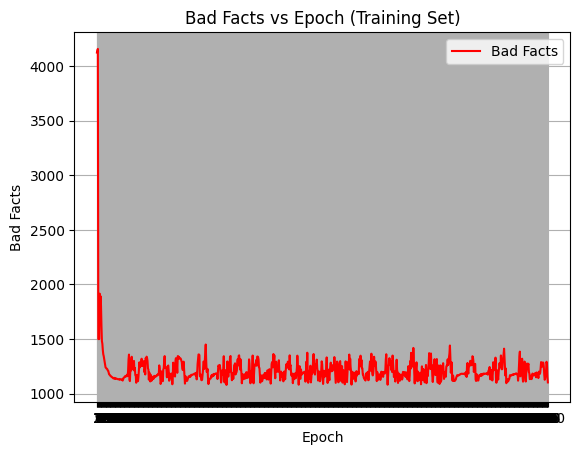

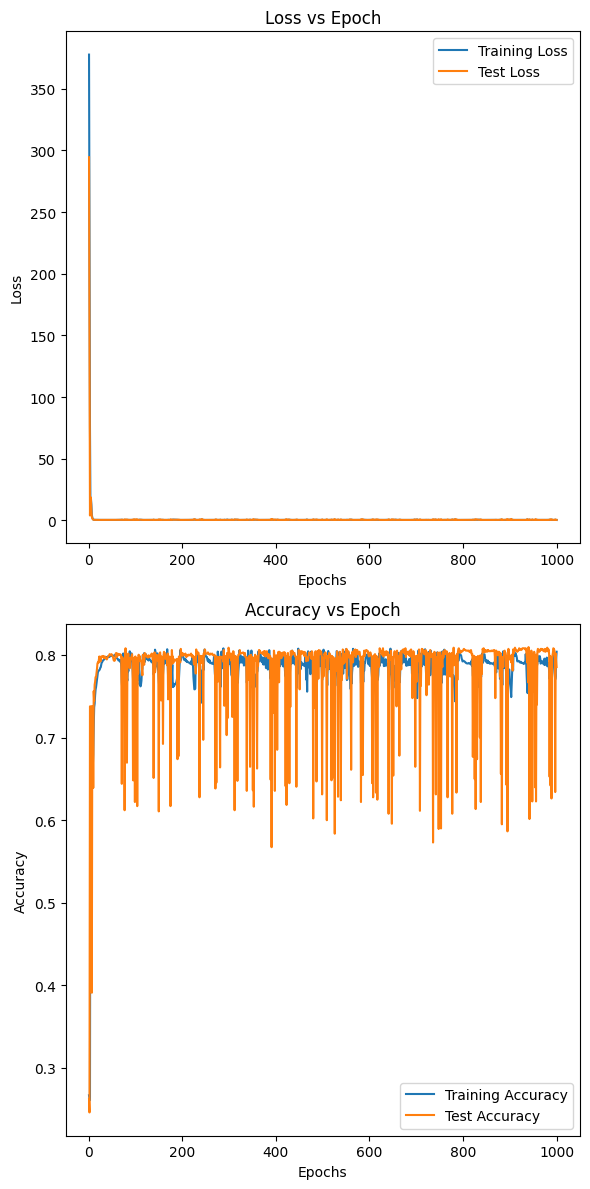

Final Training Loss: 0.4117
Final Training Accuracy: 80.39%
Final Test Loss: 0.4429
Final Test Accuracy: 78.54%


In [ ]:
## Bad Facts vs Epoch
# Retrieve accuracy values for training set
train_accuracy = np.array(history.history['accuracy'])

# Calculate "bad facts" for each epoch
total_training_samples = len(y_train)
bad_facts_per_epoch = total_training_samples * (1 - train_accuracy)

# Plotting
epochs = range(1, len(bad_facts_per_epoch) + 1)
plt.plot(epochs, bad_facts_per_epoch, color='red', label="Bad Facts")
plt.xlabel("Epoch")
plt.ylabel("Bad Facts")
plt.title("Bad Facts vs Epoch (Training Set)")
# plt.xticks(range(200, len(bad_facts_per_epoch) + 1))  # Ensure all epochs are visible
plt.legend()
plt.grid(True)
plt.show()

# Access training metrics
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Access test metrics from the callback
test_loss = test_set_evaluator.test_loss_values
test_accuracy = test_set_evaluator.test_accuracy_values

# Create an array for the epoch numbers
epochs = np.arange(1, len(train_loss) + 1)

# debug
# print("Epochs:", epochs)                # Print the entire epochs array
# print("Train Loss:", train_loss)        # Print the entire training loss array
# print("Test Loss:", test_loss)          # Print the entire test loss array

# Plotting the results
plt.figure(figsize=(6, 12))

# Loss curve
plt.subplot(2, 1, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Curves - graph should be visually the inverse of Bad Facts vs Epoch
# Accuracy curve
plt.subplot(2, 1, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results for comparison
print(f"Final Training Loss: {train_loss[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracy[-1] * 100:.2f}%")
print(f"Final Test Loss: {test_loss[-1]:.4f}")
print(f"Final Test Accuracy: {test_accuracy[-1] * 100:.2f}%")

 1/44 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
X_test:
[[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 2.06500e+01
  2.06500e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.06000e+01
  3.30250e+02]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 1.98000e+01
  1.98000e+01]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 6.97500e+01
  3.24600e+02]
 [1.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 1.15000e+02
  7.39615e+03]
 [0.00000e+00 1.00000e+00 1.00000e+00 ... 0.00000e+00 4.33500e+01
  3.71400e+02]]
y_pred:
[[0.3563052 ]
 [0.10867561]
 [0.28503478]
 ...
 [0.60456   ]
 [0.44909072]
 [0.49877706]]
y_pred:
[0 0 0 ... 1 0 0]
y_test:
[0 0 0 ... 1 0 0]


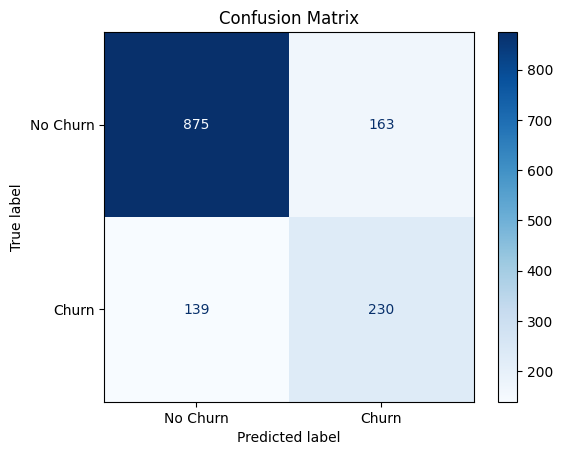

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# `X_test` and `y_test` are the test inputs and true labels

# Get predictions (convert probabilities to binary 0/1 predictions)
y_pred = model.predict(X_test) # results are between 0 and 1, with the point
print('X_test:', X_test, 'y_pred:', y_pred, sep='\n')
y_pred = (y_pred >= 0.5).astype(int).flatten() # round results to 0 or 1 and flatten

print('y_pred:', y_pred, 'y_test:', y_test, sep='\n')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Not sure if `Churn` can remain 0 or 1 or if has to be one-hot encoded for "Churn" and "No Churn". [Source](https://medium.com/@ckekula/implementing-multilayer-perceptrons-a-mathematical-guide-c528ea89704d#:~:text=Classification%20MLPs&text=For%20a%20binary%20classification%20problem,probability%20of%20the%20positive%20class.) says that I only need 1 output (Churn), although I thought that there should be 2 output neurons (Churn and No Churn).

The graphs and confusion matrix are not that strange as before (when I had the NaN values of TotalCharges). Even `y_pred` has different - the predicted values were all the same number before, now they are different from each other.